# Heart Failure Clinical Records Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.shape

(299, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.anaemia = df.anaemia.replace( {0:'No', 1:'Yes'})
df.diabetes = df.diabetes.replace({0:"No", 1:'Yes'})
df.high_blood_pressure = df.high_blood_pressure.replace({0:"No", 1:'Yes'})
df.sex = df.sex.replace({0:'Female', 1:'Male'})
df.smoking = df.smoking.replace({0:'No', 1:'Yes'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 30.5+ KB


### Que1. What is the distribution of age among heart failure patients in the dataset?
### Insights: Increased risk of heart failure is in the age of 60.

In [10]:
df_temp = df[df['DEATH_EVENT'] == 1]

In [11]:
df_temp

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.90,130,Male,No,4,1
1,55.0,No,7861,No,38,No,263358.03,1.10,136,Male,No,6,1
2,65.0,No,146,No,20,No,162000.00,1.30,129,Male,Yes,7,1
3,50.0,Yes,111,No,20,No,210000.00,1.90,137,Male,No,7,1
4,65.0,Yes,160,Yes,20,No,327000.00,2.70,116,Female,No,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,No,582,No,20,No,263358.03,1.83,134,Male,No,198,1
230,60.0,No,166,No,30,No,62000.00,1.70,127,Female,No,207,1
246,55.0,No,2017,No,25,No,314000.00,1.10,138,Male,No,214,1
262,65.0,Yes,258,Yes,25,No,198000.00,1.40,129,Male,No,235,1


In [12]:
df_temp['age'].value_counts()

age
60.000    13
65.000     8
50.000     8
70.000     7
75.000     6
45.000     6
80.000     5
72.000     5
59.000     3
85.000     3
55.000     3
95.000     2
69.000     2
58.000     2
82.000     2
68.000     2
48.000     2
90.000     2
54.000     1
77.000     1
60.667     1
46.000     1
86.000     1
42.000     1
62.000     1
49.000     1
53.000     1
57.000     1
51.000     1
83.000     1
87.000     1
94.000     1
73.000     1
Name: count, dtype: int64

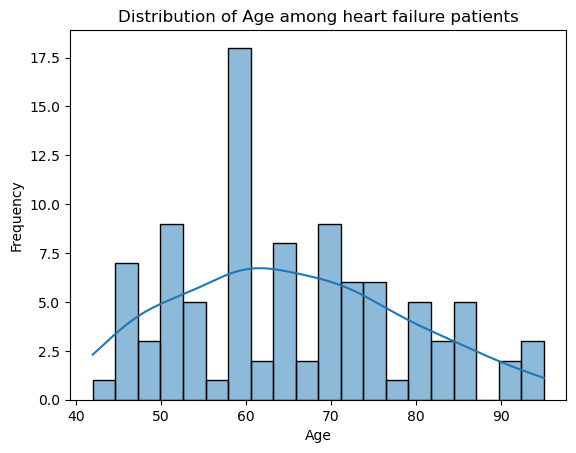

In [13]:
sns.histplot(data = df_temp, x = 'age', bins = 20, kde = True )
plt.title("Distribution of Age among heart failure patients")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()

### Que2. How does the death rate vary with age?
### Insights: As age increases then chances of death are higher.

In [15]:
age_group = pd.cut(df['age'], bins = 10)

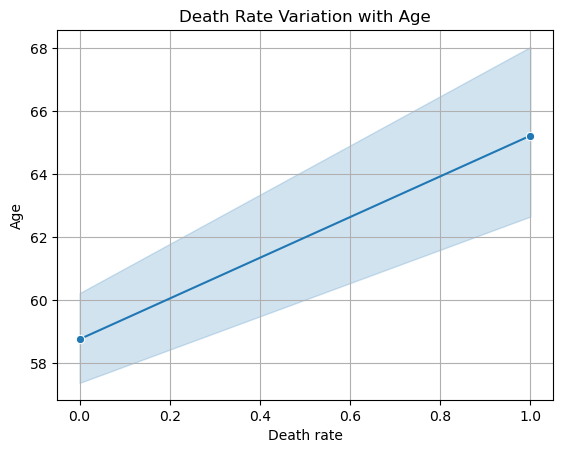

In [16]:
sns.lineplot(data = df, y = 'age', x = 'DEATH_EVENT', marker = 'o')
plt.title('Death Rate Variation with Age')
plt.xlabel('Death rate')
plt.ylabel('Age')
plt.grid(True)
plt.show()

### Que3. What is the percentage of male and female patients in the dataset?
### Insights: There are 64.9% male and 35.1% female

In [18]:
df.sex.value_counts(normalize = True)

sex
Male      0.648829
Female    0.351171
Name: proportion, dtype: float64

<Axes: ylabel='count'>

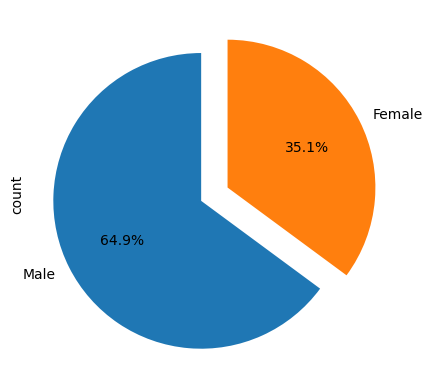

In [19]:
df.sex.value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, explode = (0.1, 0.1))

### Que4. How does the platelets count vary among different age groups?
### Insights: platelets are very low in the age of 78 to 84

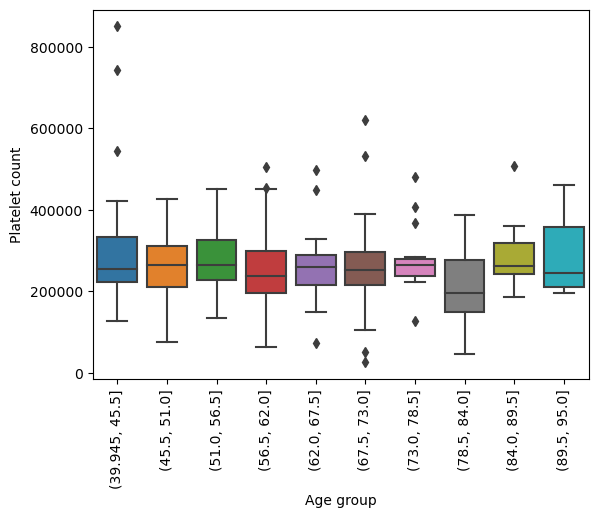

In [21]:
df['age_group'] = pd.cut(df['age'], bins = 10)
sns.boxplot(data = df, x = 'age_group', y = 'platelets')
plt.xlabel("Age group")
plt.ylabel('Platelet count')
plt.xticks(rotation = 90)
plt.show()

### Que5.  Is there a correlation between creatinine and sodium levels in the blood?
### Insights: negative corelation

In [23]:
df['serum_creatinine'].corr(df['serum_sodium'])

-0.1890952100911741

<Axes: xlabel='serum_sodium', ylabel='serum_creatinine'>

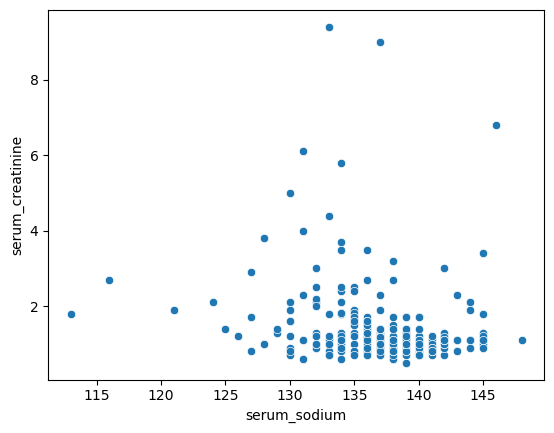

In [24]:
sns.scatterplot(x = 'serum_sodium', y = 'serum_creatinine', data = df)

### Que6. How does the prevalence of high blood pressure differ between male and female patients?
### Insights: High prevalence of blood pressure among the male.

In [26]:
df.groupby(['sex'])['high_blood_pressure'].value_counts()

sex     high_blood_pressure
Female  No                      61
        Yes                     44
Male    No                     133
        Yes                     61
Name: count, dtype: int64

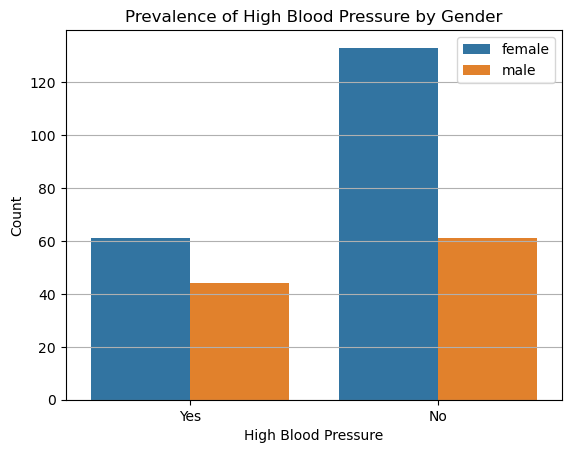

In [27]:
sns.countplot(data = df, x = 'high_blood_pressure', hue = 'sex')
plt.grid(axis = 'y')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.legend(labels = ['female', 'male'])
plt.show()

In [28]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

### Que7. What is the relationship between smoking habits and the occurrence of heart failure?
### Insights: Smoking habits effects on heart failure.

In [30]:
df.groupby(['smoking'])['DEATH_EVENT'].value_counts()

smoking  DEATH_EVENT
No       0              137
         1               66
Yes      0               66
         1               30
Name: count, dtype: int64

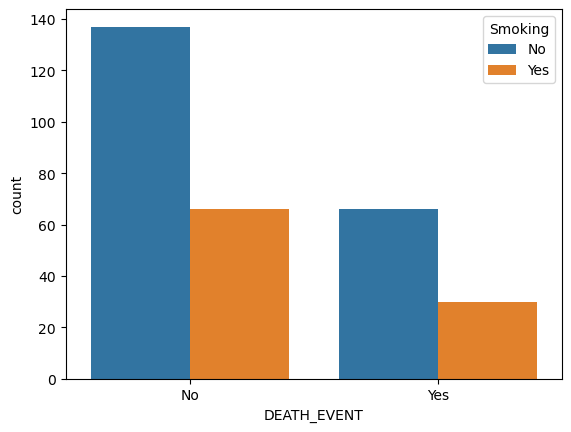

In [31]:
sns.countplot(data = df, x = 'DEATH_EVENT', hue = 'smoking')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.legend(labels = ['No','Yes'], title = 'Smoking')
plt.show()

### Que8. Are there any noticeable patterns in the distribution of death events across different age groups?
### Insights : Chances of survival for heart failure patients above the age of 70 are low.

In [43]:
df['ageGroup'] = pd.cut(df['age'], bins = 10)

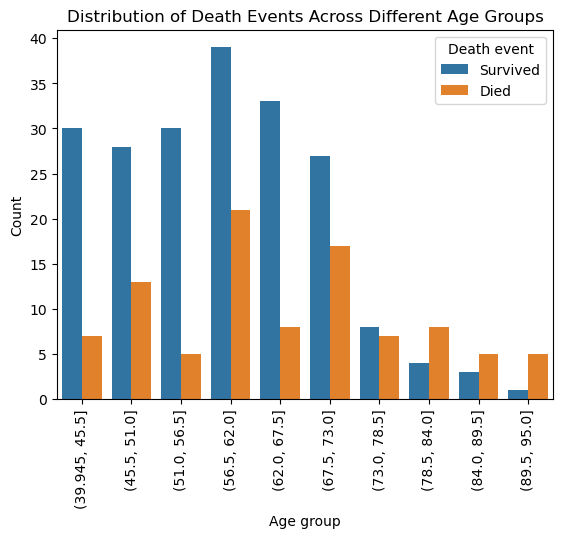

In [47]:
sns.countplot(x = 'ageGroup', hue = 'DEATH_EVENT', data = df)
plt.xticks(rotation = 90)
plt.legend(title = 'Death event', labels = ['Survived','Died'])
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

### Que9. Is there any significant difference in ejection fraction between patients with and without diabetes?
### Insights: Diabetic person has low ejection fraction. So diabetic person has high chance of heart fail.

In [50]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group', 'ageGroup'],
      dtype='object')

In [53]:
df.groupby(['ejection_fraction'])['diabetes'].value_counts()

ejection_fraction  diabetes
14                 No           1
15                 No           1
                   Yes          1
17                 Yes          2
20                 No          14
                   Yes          4
25                 No          22
                   Yes         14
30                 No          17
                   Yes         17
35                 No          27
                   Yes         22
38                 Yes         22
                   No          18
40                 No          24
                   Yes         13
45                 No          14
                   Yes          6
50                 No          15
                   Yes          6
55                 Yes          3
60                 No          17
                   Yes         14
62                 Yes          1
                   No           1
65                 No           1
70                 No           1
80                 No           1
Name: count, dtype: 

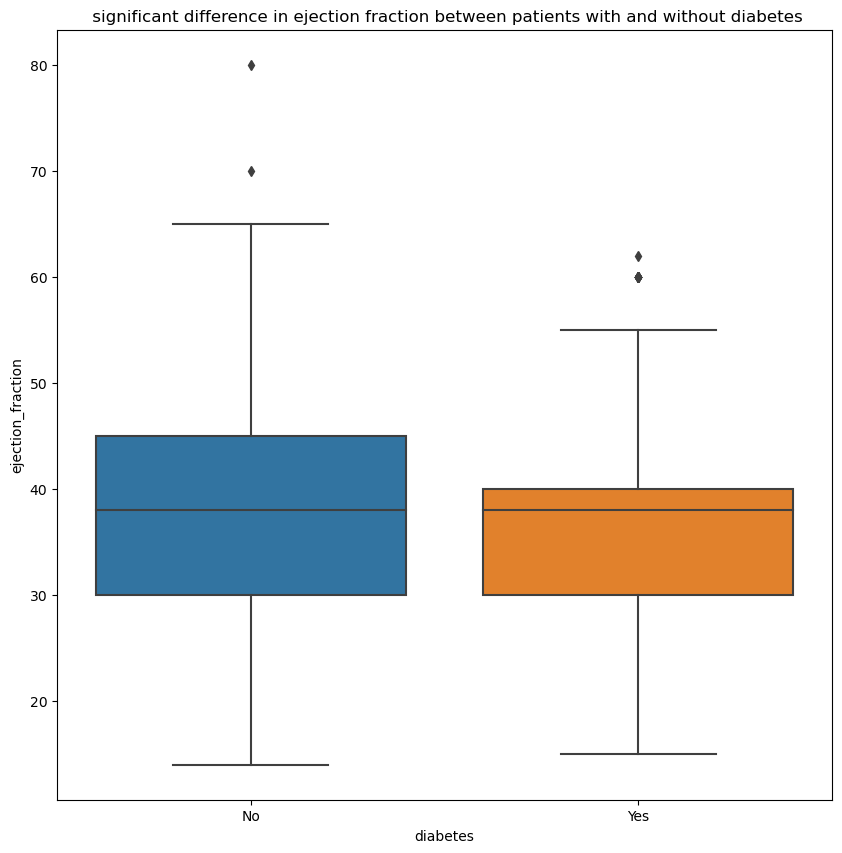

In [52]:
plt.figure(figsize = (10,10))
sns.boxplot(y = 'ejection_fraction', x = 'diabetes', data = df)
plt.title(' significant difference in ejection fraction between patients with and without diabetes')
plt.show()

### Que10. How does the serum creatinine level vary between patients who survived and those who did not?
### Insights: Individuals with high serum creatinine levels are more likely to have survived heart failure.

In [57]:
df.serum_creatinine

0      1.9
1      1.1
2      1.3
3      1.9
4      2.7
      ... 
294    1.1
295    1.2
296    0.8
297    1.4
298    1.6
Name: serum_creatinine, Length: 299, dtype: float64

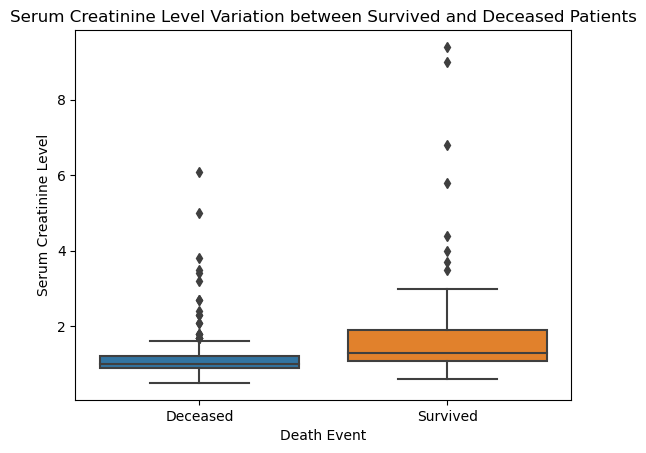

In [58]:
sns.boxplot(y = 'serum_creatinine', x = 'DEATH_EVENT', data = df)
plt.title('Serum Creatinine Level Variation between Survived and Deceased Patients')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine Level')
plt.xticks([1, 0], ['Survived', 'Deceased'])
plt.show()